## Tutorial number 1
### Working with ethoscope data
The tutorial will guide you through loading data, visualisation and plotting using the common sleep functions

## 1. Load the dummy dataset

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from math import floor, ceil, sqrt
from scipy.stats import zscore
from functools import partial, update_wrapper
from colour import Color

from ethoscopy.behavpy_draw import behavpy_draw

from ethoscopy.misc.circadian_bars import circadian_bars
from ethoscopy.analyse import max_velocity_detector
from ethoscopy.misc.rle import rle
from ethoscopy.misc.bootstrap_CI import bootstrap
from ethoscopy.misc.hmm_functions import hmm_pct_transition, hmm_mean_length, hmm_pct_state
from ethoscopy.misc.static_functions import concat

import ethoscopy as etho
import seaborn as sns

In [2]:
# This tutorial requires version 1.1.7 or greater
etho.__version__

'2.0.dev0'

In [3]:
# d = pd.read_pickle('/home/lab/Desktop/ethoscopy/tutorial_notebook/response_d.pkl')
# m = pd.read_pickle('/home/lab/Desktop/ethoscopy/tutorial_notebook/response_m.pkl')
# df = etho.behavpy(d, m, check = True, canvas = 'seaborn')
# df.meta['exp'] = df.meta['odour'] + '-' + df.meta['rest']
# fargs =  ['air-first day', 'air-second day']#, 'air-third day', 'air-fourth day', 'air-fifth day', '5% AA-first day', '5% AA-second day', '5% AA-third day', '5% AA-fourth day', '5% AA-fifth day']
# df.canvas

In [4]:
df = pd.read_pickle('/home/lab/Desktop/test_ago_hmm/pickles/acv_response_data.pkl')
pdf = pd.read_pickle('/home/lab/Desktop/test_ago_hmm/pickles/acv_response_puff.pkl')
df = etho.behavpy(df, df.meta)
pdfs = etho.behavpy(pdf, pdf.meta, check = True, canvas = 'seaborn')
pdfp = etho.behavpy(pdf, pdf.meta, check = True, canvas = 'plotly')

In [5]:
# df1 = pd.read_pickle('/home/lab/Desktop/test_ago_hmm/pickles/air_1_data_c.pkl')
# df2 = pd.read_pickle('/home/lab/Desktop/test_ago_hmm/pickles/air_2_data_c.pkl')
# pdf1 = pd.read_pickle('/home/lab/Desktop/test_ago_hmm/pickles/air_1_puff_c.pkl')
# pdf2 = pd.read_pickle('/home/lab/Desktop/test_ago_hmm/pickles/air_2_puff_c.pkl')
# df = etho.concat(df1, df2)
# pdf = etho.concat(pdf1, pdf2)
# df = etho.behavpy(df, df.meta, check = True, canvas = 'seaborn')
# pdfs = etho.behavpy(pdf, pdf.meta, check = True, canvas = 'seaborn')
# pdfp = etho.behavpy(pdf, pdf.meta, check = True, canvas = 'plotly')

In [6]:
# tdf = df.xmv('date', '2024-03-14')
# tpdf = pdf.xmv('date', '2024-03-14')

In [7]:
# pdfs = pdfs[pdfs['has_interacted'] == 1]

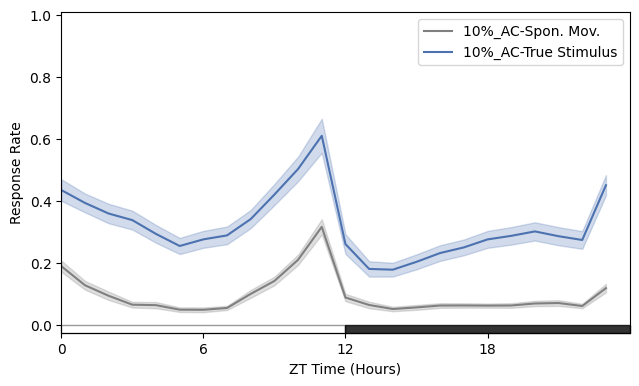

In [8]:
pdfs.plot_response_overtime(t_bin_hours=1, wrapped = True, facet_col = 'type');

In [11]:
# fig = pdfp.plot_response_overtime(t_bin_hours=1, wrapped = True, facet_col = 'type')
# fig.show()

In [ ]:

    # def get_hourly_response(data, time_window_length):
    #     data['bin_time'] = data[t_column].map(lambda t: time_window_length * floor(t / time_window_length)) 
    #     gb = data.groupby(['bin_time', 'has_interacted']).agg(**{
    #                 'response_rate' : (response_col, 'mean'),
    #                 'puff_count' : (response_col, 'count')

    #     })
    #     return gb

    # fig = make_subplots(specs=[[{ "secondary_y" : True}]])

    # max_var = []
    # y_range, dtick = self._check_boolean(list(self[response_col]))
    # if y_range is not False:
    #     max_var.append(1)

    # if secondary is False:
    #     fig = go.Figure() 
    # else:
    #     fig = make_subplots(specs=[[{ "secondary_y" : True}]])
    #     self._plot_ylayout(fig, yrange = False, t0 = 0, dtick = False, ylabel = 'Puff Count', title = title, secondary = True, xdomain = 'x1', grid = grids)

    # self._plot_ylayout(fig, yrange = y_range, t0 = 0, dtick = dtick, ylabel = 'Response Rate', title = title, secondary = False, grid = grids)

    # col_list = self._get_colours(d_list)
    # self._plot_xlayout(fig, xrange = False, t0 = 0, dtick = day_length/4, xlabel = 'ZT (Hours)')



    # max_x = []
    # min_t = []
    # max_t = []

    # for data, name, col in zip(d_list, facet_labels, col_list):

    #     if len(data) == 0:
    #         print(f'Group {name} has no values and cannot be plotted')
    #         continue

    #     if wrapped is True:
    #         data[t_column] = data[t_column] % (60*60*day_length)
    #     data[t_column] = data[t_column] / (60*60)
            
    #     min_t.append(int(lights_off * floor(data[t_column].min() / lights_off)))
    #     max_t.append(int(12 * ceil(data[t_column].max() / 12)) )

    #     if len(list(set(data.has_interacted))) == 1:
    #         loop_itr = list(set(data.has_interacted))
    #     else:
    #         loop_itr = [2, 1]

    #     for q in loop_itr:

    #         if q == 1:
    #             qcol = col
    #             lab = name
    #         elif q == 2:
    #             qcol = 'grey'
    #             lab = f'{name} Spon. Mov'
            
    #         tdf = data[data[int_id_col] == q].reset_index()
    #         rdf = tdf.groupby('id', group_keys = False).apply(partial(get_hourly_response, time_window_length = bin_time))

    #         filt_gb = rdf.groupby('bin_time').agg(**{
    #                     'mean' : ('response_rate', 'mean'),
    #                     'count' : ('puff_count', 'sum'),
    #                     'ci' : ('response_rate', bootstrap)
    #         })
    #         filt_gb[['y_max', 'y_min']] = pd.DataFrame(filt_gb['ci'].tolist(), index =  filt_gb.index)
    #         filt_gb.drop('ci', axis = 1, inplace = True)
    #         filt_gb.reset_index(inplace = True)

    #         max_x.append(np.nanmax(filt_gb['bin_time']))

    #         upper, trace, lower = self._plot_line(df = filt_gb, x_col = 'bin_time', name = lab, marker_col = qcol)
    #         fig.add_trace(upper)
    #         fig.add_trace(trace) 
    #         fig.add_trace(lower)

    #         if secondary is True:
    #             fig.add_trace(
    #             go.Scatter(
    #                 legendgroup = lab,
    #                 x = filt_gb['bin_time'],
    #                 y = filt_gb['count'],
    #                 mode = 'lines',
    #                 name = f'{lab} count',
    #                 line = dict(
    #                     dash = 'longdashdot',
    #                     shape = 'spline',
    #                     color = qcol
    #                     ),
    #                 ),
    #             secondary_y = True
    #             )
    # # Light-Dark annotaion bars
    # bar_shapes, min_bar = circadian_bars(np.nanmin(min_t), np.nanmax(max_t), max_y = np.nanmax(max_var), day_length = day_length, lights_off = lights_off)
    # fig.update_layout(shapes=list(bar_shapes.values()))
    # fig['layout']['xaxis']['range'] = [1, np.nanmax(max_t)]

    # return fig

In [6]:
# tpdf = tpdf[tpdf['has_interacted'] == 1]

In [10]:
# x = pdfs.plot_response_over_activity(df, activity = 'inactive', variable = 'moving', facet_col = 'machine_name', facet_arg = None, facet_labels = None, title = '', t_column = 't', grids = False);

In [8]:
x = pdfp.plot_response_over_activity(df, activity = 'inactive', variable = 'moving', facet_col = 'machine_name', facet_arg = None, facet_labels = None, title = '', t_column = 't', grids = False)
x.show()

In [5]:
# tdf = etho.behavpy(d, m, check = True, canvas = 'plotly')
# tdf.meta['exp'] = tdf.meta['odour'] + '-' + tdf.meta['rest']
# fig, stats_s = tdf.plot_response_quantify(title = '')
# fig.show()

In [6]:
# fig, stats_s = tdf.plot_quantify('x', facet_col = 'exp')
# fig.show()

In [7]:
# fig, stats_s = df.plot_quantify('x', facet_col = 'exp')

In [8]:
ndf = df[df['has_interacted'] == 1]

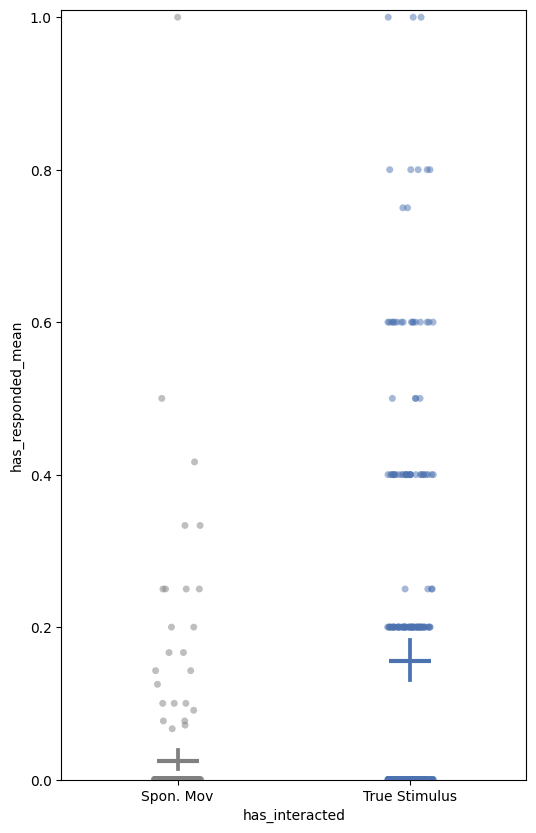

In [9]:
fig, stats_s = df.plot_response_quantify(title = '')
# fig.show()

In [10]:
['t', *['t', 't']]

['t', 't', 't']

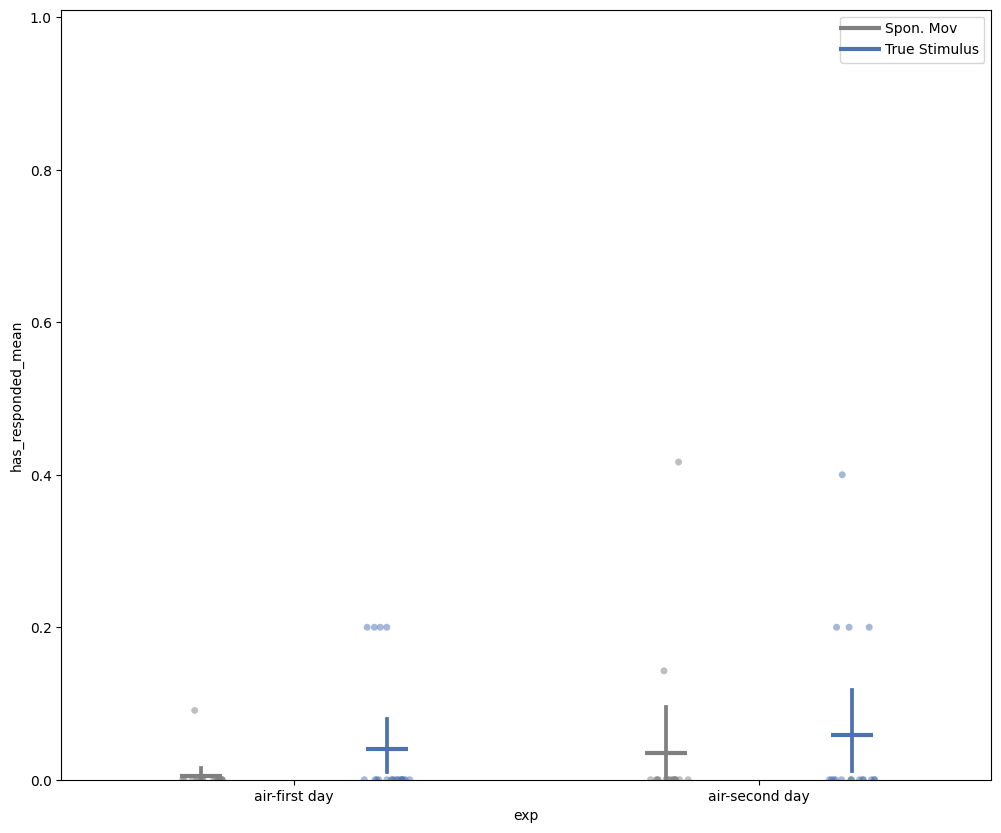

In [11]:
fig, stats_s = df.plot_response_quantify(facet_col = 'exp', facet_arg = fargs, title = '')

In [12]:
for i

SyntaxError: invalid syntax (2081252185.py, line 1)

In [ ]:
stats_s

In [ ]:
stats_s[stats_s['exp'] == 'air-first day'][stats_s[stats_s['exp'] == 'air-first day']['has_interacted'] == 'True Stimulus']

In [ ]:
df = etho.behavpy(d, m, check = True, canvas = 'plotly')
df.meta['exp'] = df.meta['odour'] + '-' + df.meta['rest']
fig, stats_p = df.plot_response_quantify(facet_col = 'exp', facet_arg = fargs, title = '')
fig.show()